#### Teoría de Circuitos II
# Tarea Semanal 3
#### Santiago Naso

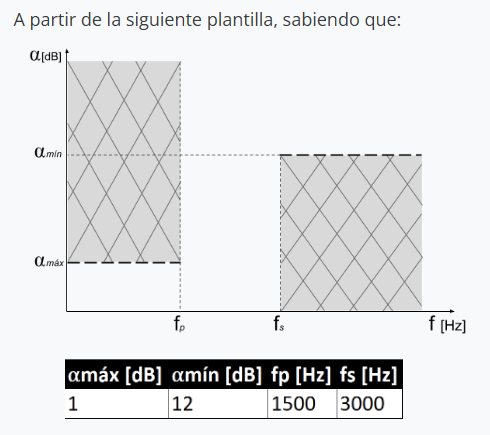

In [4]:
from IPython.display import IFrame

IFrame('punto 1.pdf', width=1000, height=550)

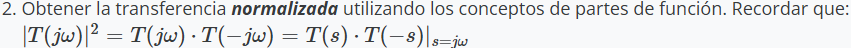

In [9]:
from IPython.display import IFrame

IFrame('punto 2.pdf', width=1000, height=1050)

In [13]:
from IPython.display import IFrame

IFrame('punto 3.pdf', width=1000, height=550)

#### Aproximaciones de Butterworth

#### _ord_3_alphaMax_1_alphaMin_12

<IPython.core.display.Math object>

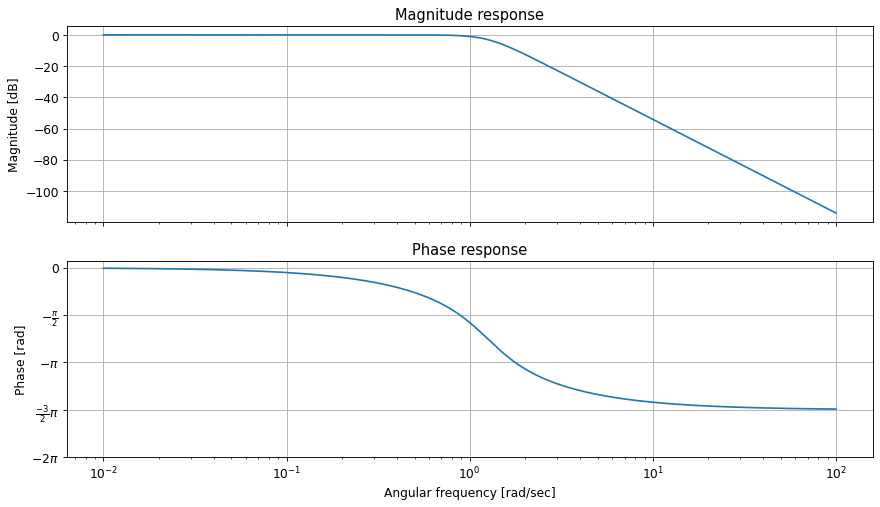

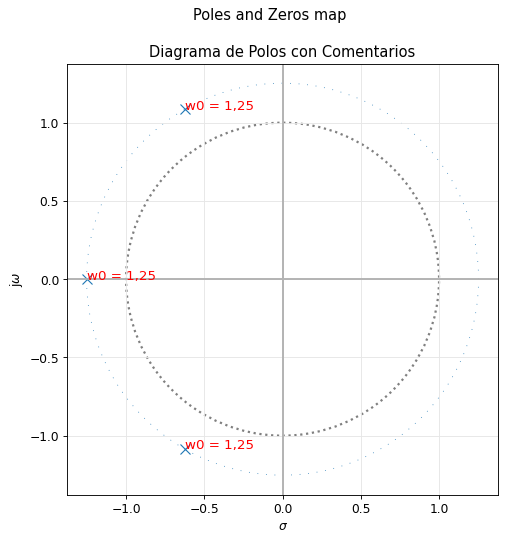

In [7]:
# Inicialización e importación de módulos

# Módulos externos
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from scipy.signal import TransferFunction

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi

fig_font_size = 11

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

from pytc2.sistemas_lineales import pzmap, bodePlot

from pytc2.general import print_subtitle

# Orden para la aproximación
orders2analyze = 3

# Mismo requerimiento de alpha_max y alpha_min
alpha_max = 1
alpha_min = 12


print_subtitle('Aproximaciones de Butterworth')

z,p,k = sig.buttap(orders2analyze)

eps = np.sqrt( 10**(alpha_max/10) - 1 )
num, den = sig.zpk2tf(z,p,k)
num, den = sig.lp2lp(num, den, eps**(-1/orders2analyze))

z,p,k = sig.tf2zpk(num, den)

num, den = sig.zpk2tf(z,p,k)

my_tf = TransferFunction(num, den)

this_label = '_ord_' + str(orders2analyze) + '_alphaMax_' + str(alpha_max)+ '_alphaMin_' + str(alpha_min)
    
print_subtitle(this_label)
    # factorizamos en SOS's
this_sos = tf2sos_analog(num, den)

pretty_print_SOS(this_sos, mode='omegayq')
    
filter_names.append(this_label)
    
# el caracter "_" descarta la salida de la función

bodePlot(my_tf, fig_id=1)
pzmap(my_tf, fig_id=2)

_, p, _ = sig.tf2zpk(num, den)

# Agregar comentarios a los polos
for i, pole in enumerate(p):
    plt.text(np.real(pole), np.imag(pole), f'w0 = 1,25', fontsize=12, color='red', ha='left')

plt.title('Diagrama de Polos con Comentarios')
plt.grid(True)
plt.show()

#### El filtro planteado sí es un filtro Butterworth ya que no hay ripple en la banda pasante

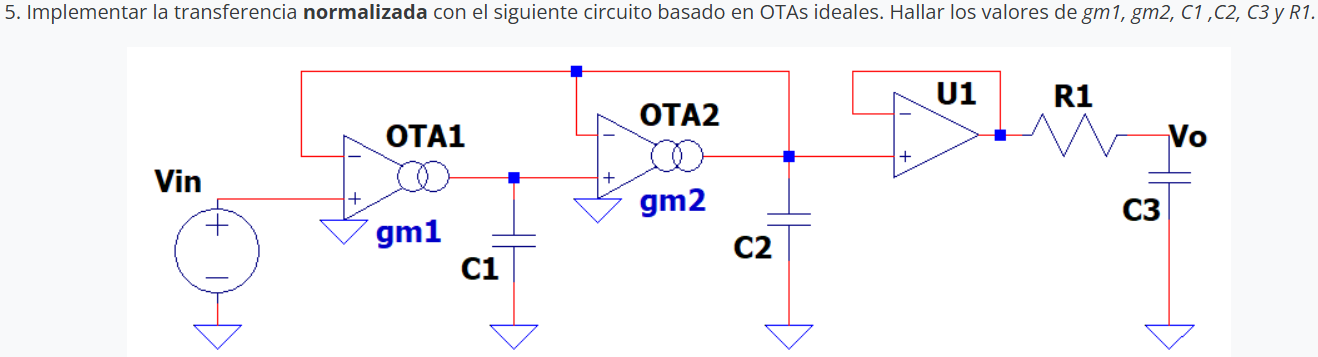

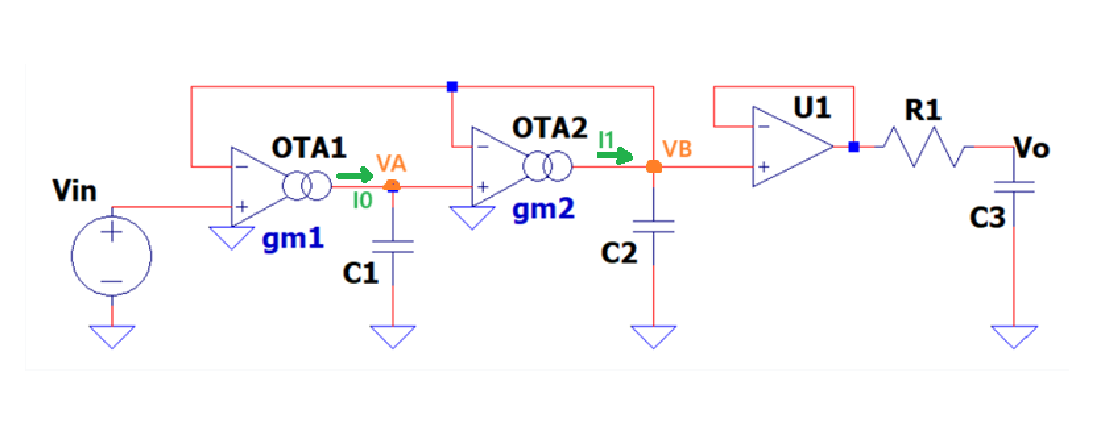

In [2]:
from IPython.display import IFrame

IFrame('punto 5.pdf', width=1000, height=1000)

# Simulación en LTSpice (w0 = 1,2526 rad => f0 = 199,36 mHz)

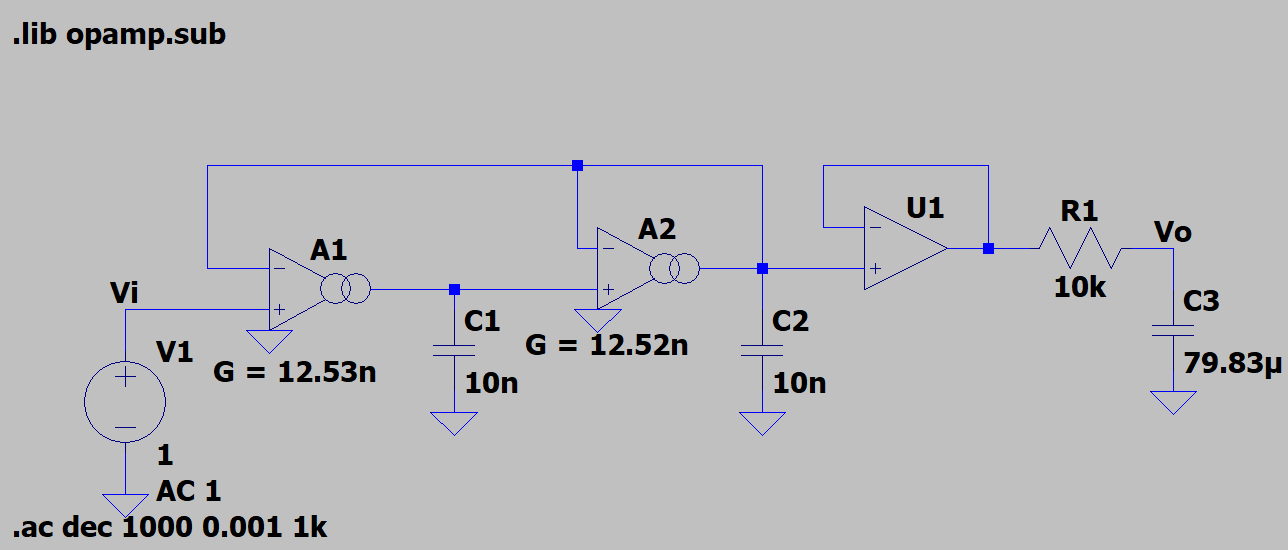

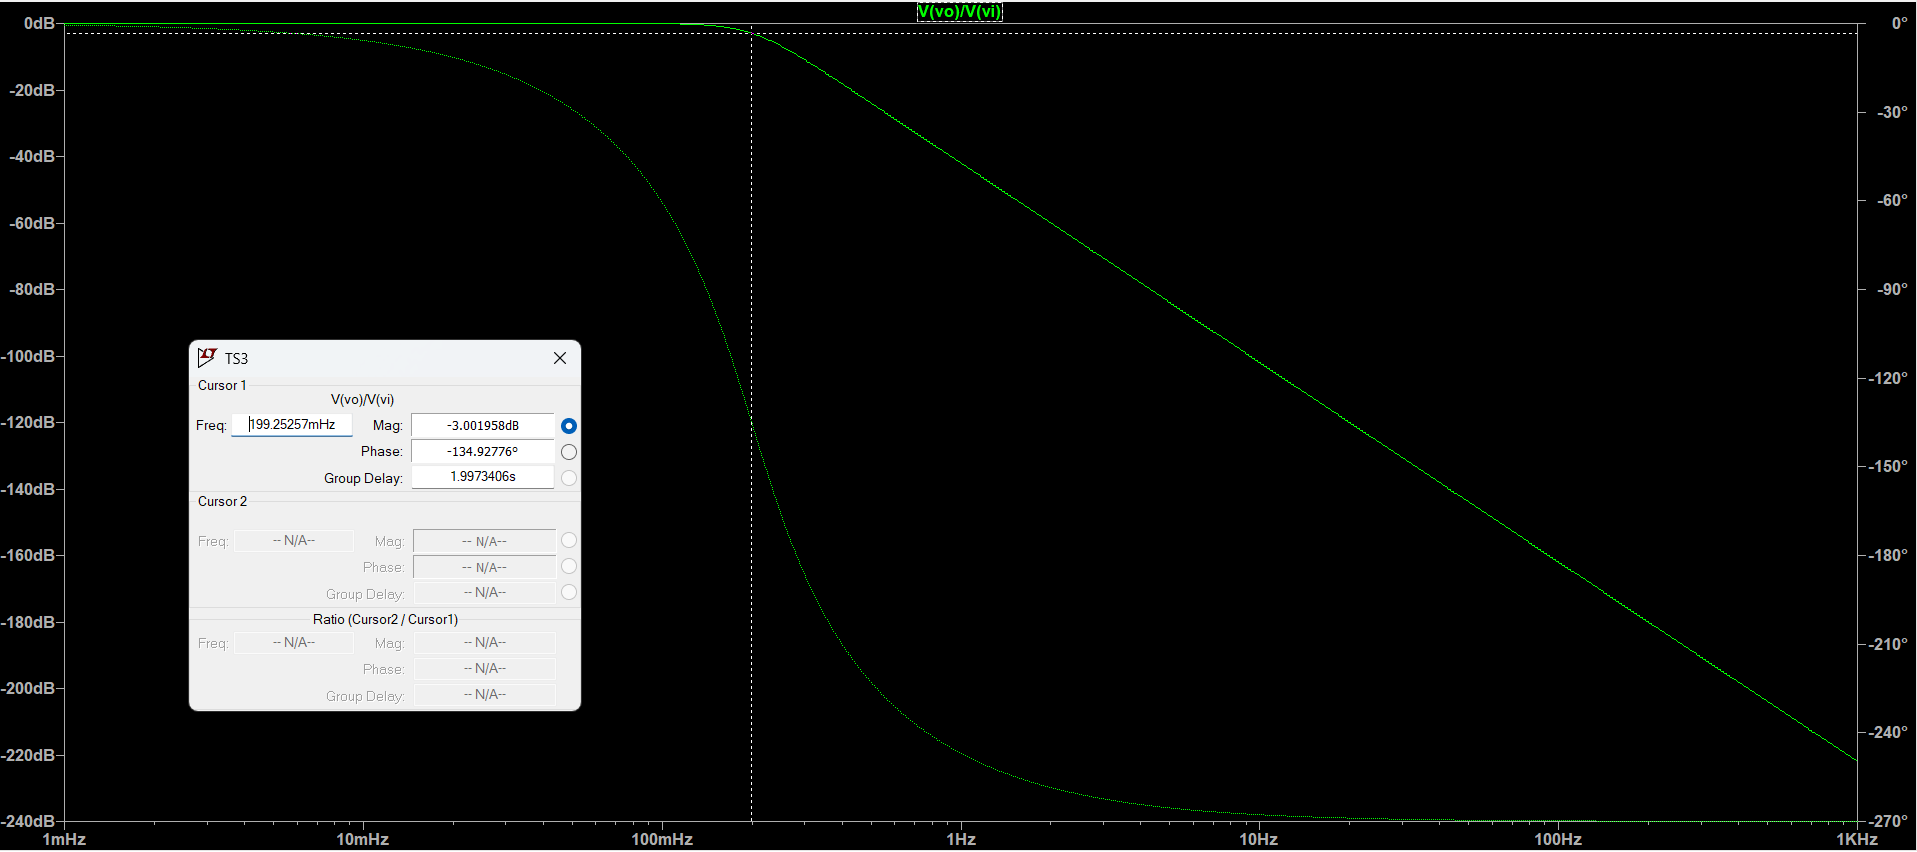

#### Para poder simular el circuito usé como referencia el w0 calculado por los datos de la plantilla y luego le asigne valores a los componentes de tal modo que respete la w0. Como se puede observar en la simulación, al ser orden 3 la transferencia cae a -60dB por decada y en la fase ocupa 270 grados. 